### 清洗数据

In [1]:
import re
import csv


"""
1、读入数据.2、清理数据.3、写出数据.
"""
filename = "ershoufang.csv"
with open(filename,encoding="utf-8") as f:
    reader = csv.reader(f)
    context = [line for line in reader]

with open("ershoufang.csv","w",encoding="utf-8",newline="") as f:
    writer = csv.writer(f)
    for line in context:
        line = [x.strip() for x in line]#去除每个数据项的空白符和换行符
        if line[0] == "id":
            writer.writerow(line)
            continue
        
        #将杂乱的记录的数据项对齐
        if "别墅" in line:
            line_copy = line[:]
            line[8] = "null"
            line[9] = line_copy[8]
            line[10] = "null"
            line[11] = line_copy[9]
            line[12] = line_copy[10]
            line[13] = line_copy[11]
            line[14] = "null"
            line[15] = "null"
            line[16] = line_copy[13]
        if "商业办公类" in line:
            #正则表达式匹配
            result = re.match(r"\d{4}-\d{1,2}-\d{1,2}",line[17])
            if result is None:
                del line[17]
            result = re.match(r"\d{4}-\d{1,2}-\d{1,2}",line[17])
            if result is None:
                del line[17]
            result = re.match(r"\d{4}-\d{1,2}-\d{1,2}",line[17])
            if result is None:
                del line[17]
        if "车库" in line:
            line_copy = line[:]
            line[5] = "null"
            line[6] = line_copy[5]
            line[7] = "null"
            line[11] = line_copy[7]
        
        try:
            #将总价数据项统一整理为整数    
            float_num = float(line[3])
            line[3] = str(int(float_num))
        
            #去除单价数据项单位
            line[4] = line[4].split("元")[0]
            
            #去除建筑面积数据项的单位
            if line[7] != "null" and line[7] != "暂无数据":
                line[7] = line[7].split("㎡")[0]
            
            #去除套内面积数据项的单位
            if line[9] != "null" and line[9] != "暂无数据":
                line[9] = line[9].split("㎡")[0]
            
            writer.writerow(line)
        except Exception as e:
            print("数据项转换失败!该记录未写入")


### 数据加载以及分析

In [2]:
# -*- coding: utf-8 -*-


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
#用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False

"""1、数据加载"""
#定义加载数据的文件名
#filename = "data_file\\ershoufang-mini-utf8.csv"
filename = "ershoufang.csv"
#自定义数据的行列索引（行索引使用pd默认的，列索引使用自定义的）
names = [
        "id","communityName","areaName","total","unitPriceValue",
        "fwhx","szlc","jzmj","hxjg","tnmj",
        "jzlx","fwcx","jzjg","zxqk","thbl",
        "pbdt","cqnx","gpsj","jyqs","scjy",
        "fwyt","fwnx","cqss","dyxx","fbbj",
        ]
#自定义需要处理的缺失值标记列表
miss_value = ["null","暂无数据"]
#数据类型会自动转换
#使用自定义的列名，跳过文件中的头行，处理缺失值列表标记的缺失值
df = pd.read_csv(filename,skiprows=[0],names=names,na_values=miss_value)
#print(df.info())

"""2、数据运算"""
"""3、数据可视化呈现"""


'3、数据可视化呈现'

### 房源数量

In [3]:
"""上海各区域二手房房源数量"""
total= pd.read_csv('ershoufang_total.csv',encoding = 'gbk')
total

,所在区域,房源数量,平均单价
0,浦东新区,23.10,6.9
1,崇明区,0.66,1.9
2,青浦区,3.50,5.6
3,杨浦区,5.50,8.1
4,宝山区,5.30,5.1
5,金山区,1.30,2.0
6,闵行区,10.20,6.7
7,嘉定区,3.30,4.4
8,静安区,4.20,9.3
9,长宁区,3.90,9.3


In [4]:
df1 = pd.DataFrame(total)
df1 = df1.sort_values('平均单价', ascending=False)
df1


,所在区域,房源数量,平均单价
13,黄浦区,2.00,11.6
10,徐汇区,4.60,9.5
8,静安区,4.20,9.3
9,长宁区,3.90,9.3
12,虹口区,2.50,8.5
3,杨浦区,5.50,8.1
11,普陀区,4.60,8.1
0,浦东新区,23.10,6.9
6,闵行区,10.20,6.7
2,青浦区,3.50,5.6


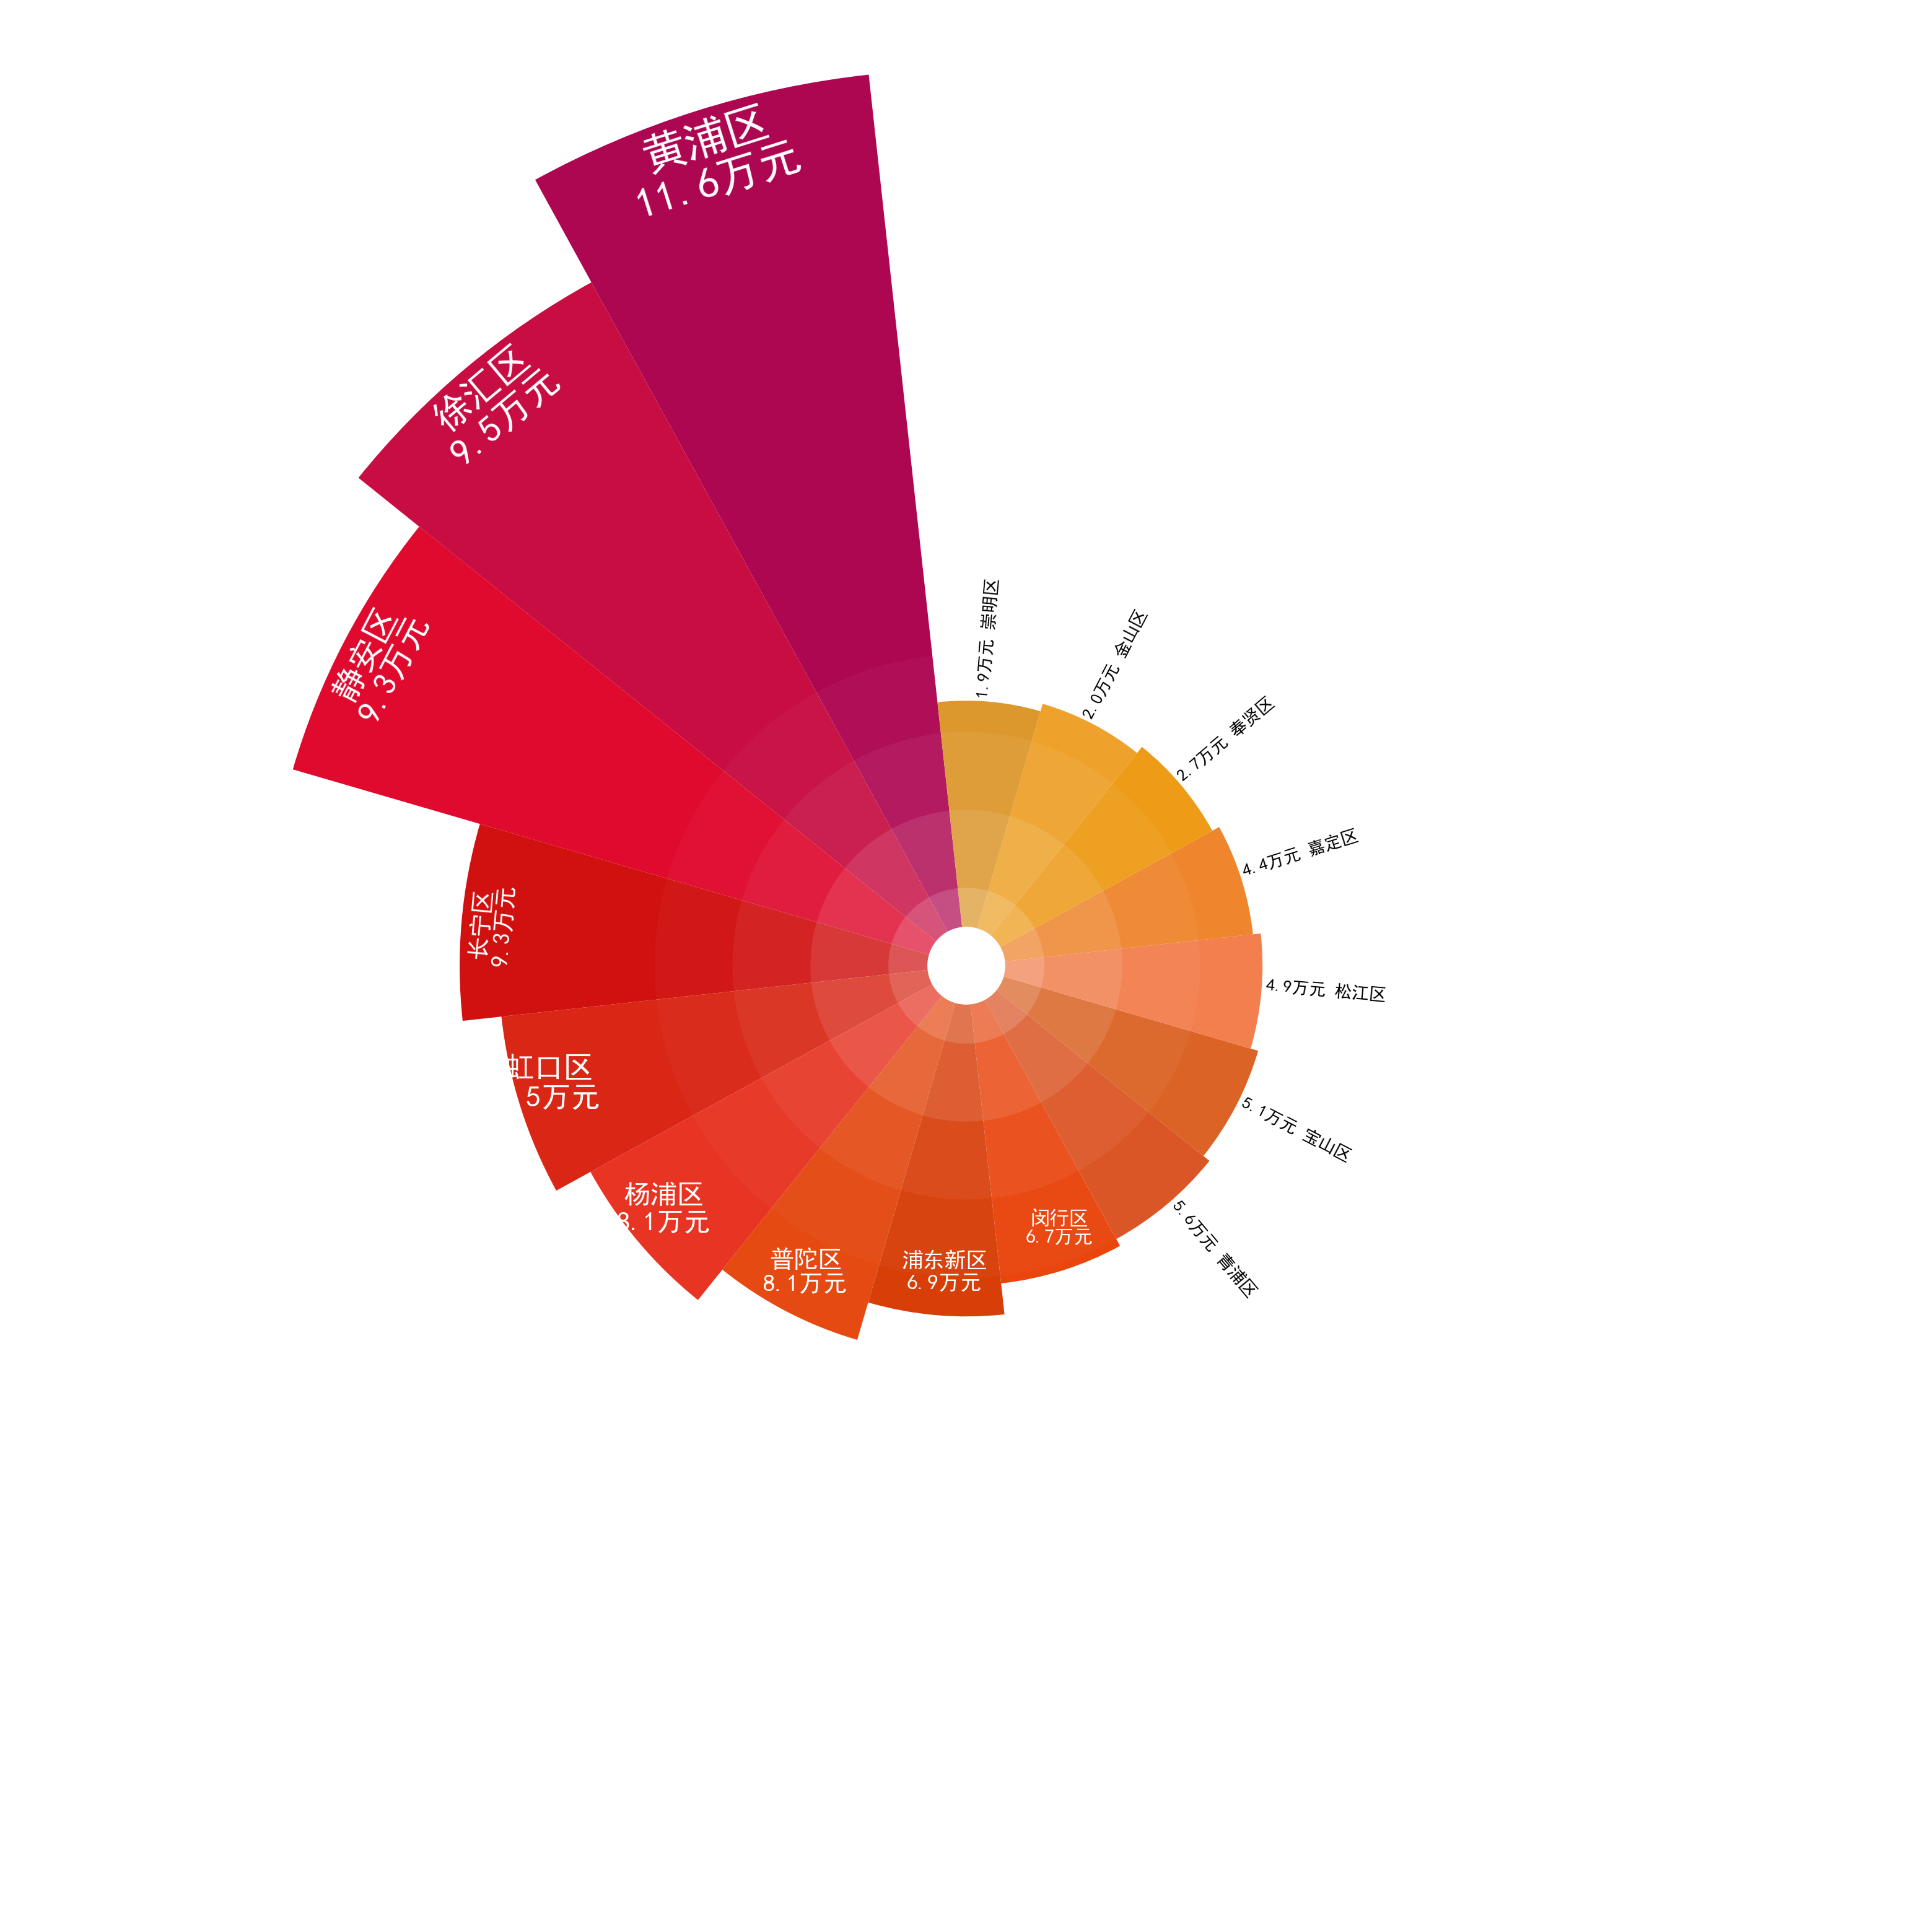

In [5]:
def rosetype_pie(place,avgprice,size,colors):
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文显示
    #plt.rcParams['font.sans-serif'] = ['Songti SC']  # 中文显示

    num= len(size) # 柱子的数量
    width = 2 * np.pi / num # 每个柱子的宽度
    rad = np.cumsum([width] * num)  # 每个柱子的角度
    
    plt.figure(figsize=(8, 8),dpi=500,)  # 创建画布
    ax = plt.subplot(projection='polar')
    ax.set_ylim(-1, np.ceil(max(size) + 1))  # 中间空白,-1为空白半径大小，可自行调整
    ax.set_theta_zero_location('N',-5.0)  # 设置极坐标的起点方向 W,N,E,S, -5.0为偏离数值，可自行调整
    ax.set_theta_direction(1) # 1为逆时针，-1为顺时针
    ax.grid(False)  # 不显示极轴
    ax.spines['polar'].set_visible(False)  # 不显示极坐标最外的圆形
    ax.set_yticks([])  # 不显示坐标间隔
    ax.set_thetagrids([])  # 不显示极轴坐标

    ax.bar(rad, size, width=width, color=colors, alpha=1) # 画图
    ax.bar(rad, 1, width=width, color='white', alpha=0.15)  # 中间添加白色色彩使图案变浅
    ax.bar(rad, 3, width=width, color='white', alpha=0.1)  # 中间添加白色色彩使图案变浅
    ax.bar(rad, 5, width=width, color='white', alpha=0.05)  # 中间添加白色色彩使图案变浅
    ax.bar(rad, 7, width=width, color='white', alpha=0.03)  # 中间添加白色色彩使图案变浅

    # 设置text
    for i in np.arange(num):
        if i < 4:
            ax.text(rad[i],  # 角度
                    size[i]-0.2,  # 长度
                    place[i]+'\n'+str(avgprice[i])+'万元',  # 文本
                    rotation=rad[i] * 180 / np.pi -5,  # 文字角度
                    rotation_mode='anchor',
                    # alpha=0.8,#透明度
                    fontstyle='normal',# 设置字体类型，可选参数[ ‘normal’ | ‘italic’ | ‘oblique’ ]，italic斜体，oblique倾斜
                    fontweight='black', # 设置字体粗细，可选参数 [‘light’, ‘normal’, ‘medium’, ‘semibold’, ‘bold’, ‘heavy’, ‘black’]
                    color='white', # 设置字体颜色
                    size=size[i]/2.2, # 设置字体大小
                    ha="center", # 'left','right','center'
                    va="top", # 'top', 'bottom', 'center', 'baseline', 'center_baseline'
                    )
        elif i < 9:
            ax.text(rad[i]+0.02,
                    size[i]-0.7,
                    place[i]+'\n'+str(avgprice[i])+'万元',
                    fontstyle='normal',
                    fontweight='black',
                    color='white',
                    size=size[i] / 1.6,
                    ha="center",
                    )
        else:
            ax.text(rad[i],
                    size[i]+0.1,
                    str(avgprice[i]) + '万元 ' + place[i],
                    rotation=rad[i] * 180 / np.pi + 85,
                    rotation_mode='anchor',
                    fontstyle='normal',
                    fontweight='black',
                    color='black',
                    size=4,
                    ha="left",
                    va="bottom",
                    )

    plt.show()

if __name__ == '__main__':

    colors = [(0.68359375, 0.02734375, 0.3203125),
                    (0.78125, 0.05078125, 0.2578125),
                    (0.875, 0.0390625, 0.1796875),
                    (0.81640625, 0.06640625, 0.0625),
                    (0.8515625, 0.1484375, 0.08203125),
                    (0.90625, 0.203125, 0.13671875),
                    (0.89453125, 0.2890625, 0.0703125),
                    (0.84375, 0.2421875, 0.03125),
                    (0.9140625, 0.26953125, 0.05078125),
                    (0.85546875, 0.31640625, 0.125),
                    (0.85546875, 0.3671875, 0.1171875),
                    (0.94921875, 0.48046875, 0.28125),
                    (0.9375, 0.51171875, 0.1484375),
                    (0.93359375, 0.59765625, 0.0625),
                    (0.93359375, 0.62890625, 0.14453125),
                    (0.86328125, 0.5859375, 0.15234375)
                    ] # 转化为小数的rgb色列表 16个颜色
    place = df1['所在区域'].tolist()   # 转换为 list
    avgprice = df1['平均单价'].tolist()
    size = [22 , 19, 17, 12, 11, 10, 9, 8, 7.2, 7.0, 6.8, 6.6, 6.4, 6.2, 6.0, 5.8] # 自定义一个柱长度列
    rosetype_pie(place, avgprice, size, colors)  

In [6]:
df2 = pd.DataFrame(total)
df2 = df2.sort_values('房源数量', ascending=False)
df2


,所在区域,房源数量,平均单价
0,浦东新区,23.10,6.9
6,闵行区,10.20,6.7
14,松江区,6.20,4.9
3,杨浦区,5.50,8.1
4,宝山区,5.30,5.1
10,徐汇区,4.60,9.5
11,普陀区,4.60,8.1
8,静安区,4.20,9.3
9,长宁区,3.90,9.3
2,青浦区,3.50,5.6


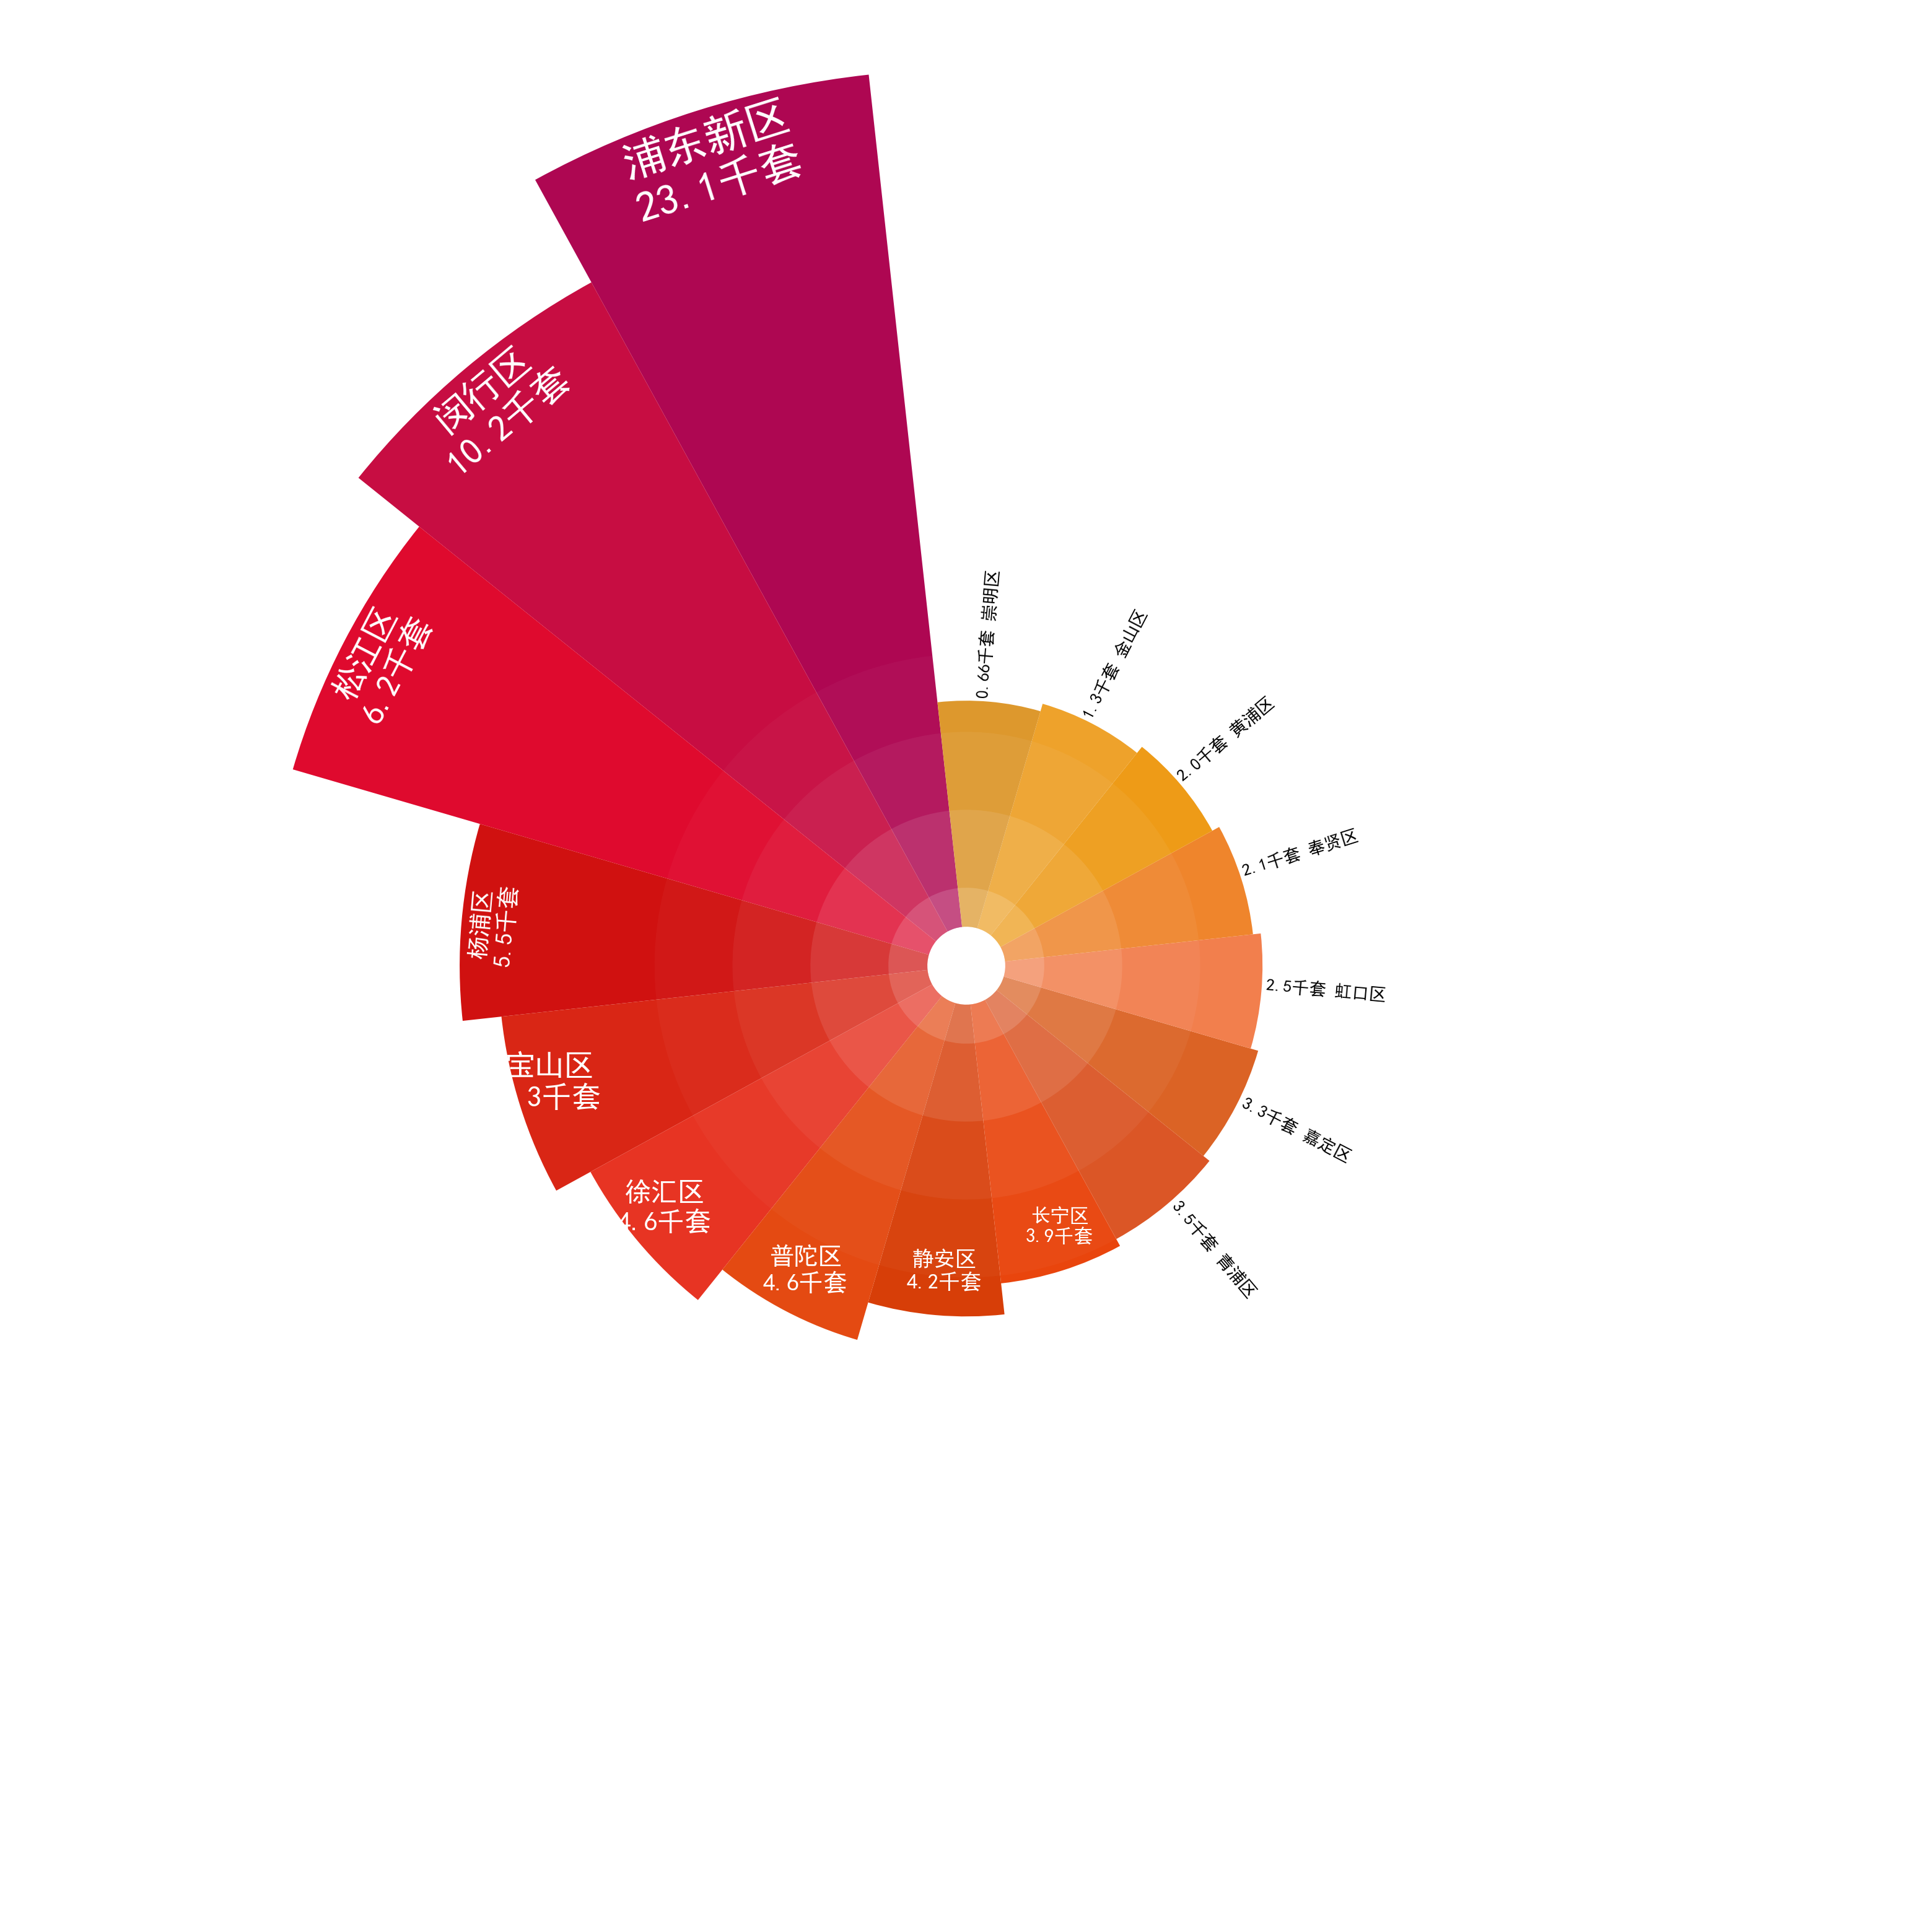

In [7]:
def rosetype_pie(place,avgprice,size,colors):
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文显示
    #plt.rcParams['font.sans-serif'] = ['Songti SC']  # 中文显示

    num= len(size) # 柱子的数量
    width = 2 * np.pi / num # 每个柱子的宽度
    rad = np.cumsum([width] * num)  # 每个柱子的角度
    
    plt.figure(figsize=(8, 8),dpi=500,)  # 创建画布
    ax = plt.subplot(projection='polar')
    ax.set_ylim(-1, np.ceil(max(size) + 1))  # 中间空白,-1为空白半径大小，可自行调整
    ax.set_theta_zero_location('N',-5.0)  # 设置极坐标的起点方向 W,N,E,S, -5.0为偏离数值，可自行调整
    ax.set_theta_direction(1) # 1为逆时针，-1为顺时针
    ax.grid(False)  # 不显示极轴
    ax.spines['polar'].set_visible(False)  # 不显示极坐标最外的圆形
    ax.set_yticks([])  # 不显示坐标间隔
    ax.set_thetagrids([])  # 不显示极轴坐标

    ax.bar(rad, size, width=width, color=colors, alpha=1) # 画图
    ax.bar(rad, 1, width=width, color='white', alpha=0.15)  # 中间添加白色色彩使图案变浅
    ax.bar(rad, 3, width=width, color='white', alpha=0.1)  # 中间添加白色色彩使图案变浅
    ax.bar(rad, 5, width=width, color='white', alpha=0.05)  # 中间添加白色色彩使图案变浅
    ax.bar(rad, 7, width=width, color='white', alpha=0.03)  # 中间添加白色色彩使图案变浅

    # 设置text
    for i in np.arange(num):
        if i < 4:
            ax.text(rad[i],  # 角度
                    size[i]-0.2,  # 长度
                    place[i]+'\n'+str(numofhouse[i])+'千套',  # 文本
                    rotation=rad[i] * 180 / np.pi -5,  # 文字角度
                    rotation_mode='anchor',
                    # alpha=0.8,#透明度
                    fontstyle='normal',# 设置字体类型，可选参数[ ‘normal’ | ‘italic’ | ‘oblique’ ]，italic斜体，oblique倾斜
                    fontweight='black', # 设置字体粗细，可选参数 [‘light’, ‘normal’, ‘medium’, ‘semibold’, ‘bold’, ‘heavy’, ‘black’]
                    color='white', # 设置字体颜色
                    size=size[i]/2.2, # 设置字体大小
                    ha="center", # 'left','right','center'
                    va="top", # 'top', 'bottom', 'center', 'baseline', 'center_baseline'
                    )
        elif i < 9:
            ax.text(rad[i]+0.02,
                    size[i]-0.7,
                    place[i]+'\n'+str(numofhouse[i])+'千套',
                    fontstyle='normal',
                    fontweight='black',
                    color='white',
                    size=size[i] / 1.6,
                    ha="center",
                    )
        else:
            ax.text(rad[i],
                    size[i]+0.1,
                    str(numofhouse[i]) + '千套 ' + place[i],
                    rotation=rad[i] * 180 / np.pi + 85,
                    rotation_mode='anchor',
                    fontstyle='normal',
                    fontweight='black',
                    color='black',
                    size=4,
                    ha="left",
                    va="bottom",
                    )

    plt.show()

if __name__ == '__main__':

    colors = [(0.68359375, 0.02734375, 0.3203125),
                    (0.78125, 0.05078125, 0.2578125),
                    (0.875, 0.0390625, 0.1796875),
                    (0.81640625, 0.06640625, 0.0625),
                    (0.8515625, 0.1484375, 0.08203125),
                    (0.90625, 0.203125, 0.13671875),
                    (0.89453125, 0.2890625, 0.0703125),
                    (0.84375, 0.2421875, 0.03125),
                    (0.9140625, 0.26953125, 0.05078125),
                    (0.85546875, 0.31640625, 0.125),
                    (0.85546875, 0.3671875, 0.1171875),
                    (0.94921875, 0.48046875, 0.28125),
                    (0.9375, 0.51171875, 0.1484375),
                    (0.93359375, 0.59765625, 0.0625),
                    (0.93359375, 0.62890625, 0.14453125),
                    (0.86328125, 0.5859375, 0.15234375)
                    ] # 转化为小数的rgb色列表 16个颜色
    place = df2['所在区域'].tolist()   # 转换为 list
    numofhouse = df2['房源数量'].tolist()
    size = [22 , 19, 17, 12, 11, 10, 9, 8, 7.2, 7.0, 6.8, 6.6, 6.4, 6.2, 6.0, 5.8] # 自定义一个柱长度列
    rosetype_pie(place, numofhouse, size, colors)   

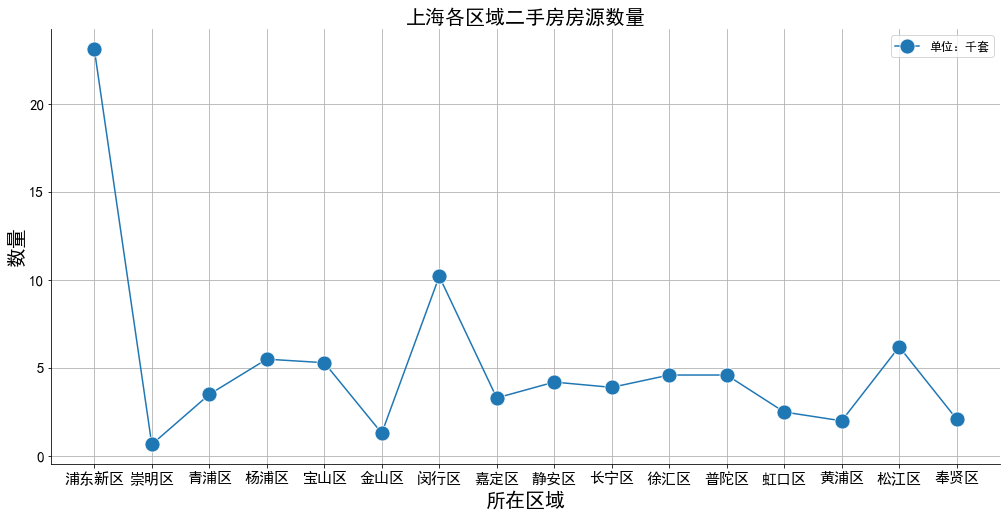

In [8]:
import seaborn as sns
plt.figure(figsize=(17, 8))
sns.lineplot(x='所在区域', y='房源数量', data=total, label='单位：千套',marker='o',markersize=15)
sns.despine()
plt.grid()
plt.legend(fancybox=True, prop={'size': 12})
plt.xlabel('所在区域',fontsize=20)
plt.ylabel('数量',fontsize=20)
plt.title('上海各区域二手房房源数量',fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

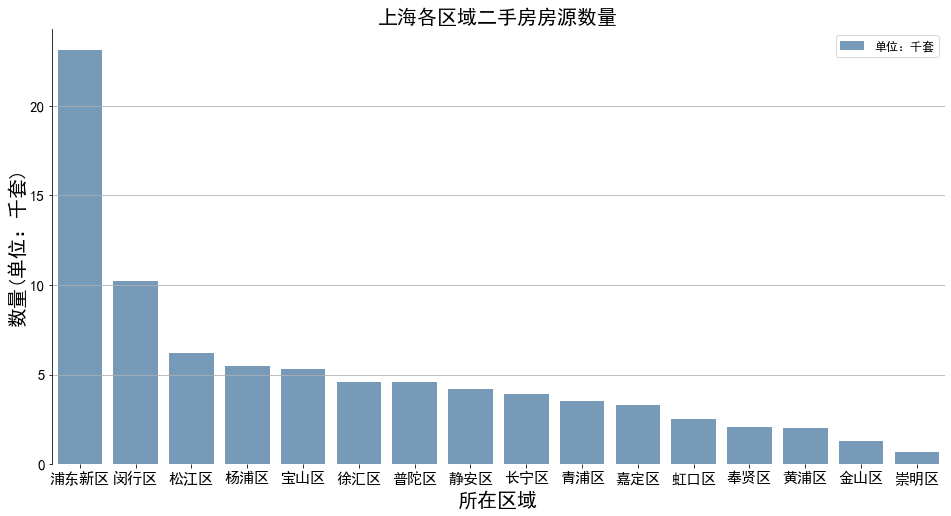

In [9]:
total = total.sort_values('房源数量', ascending=False)
plt.figure(figsize=(16, 8))
sns.barplot(x='所在区域', y='房源数量', data=total, label='单位：千套',color='steelblue', alpha=0.8)

sns.despine(bottom=True)
plt.grid(axis='y')
plt.legend(fancybox=True, prop={'size': 12})
plt.xlabel('所在区域',fontsize=20)
plt.ylabel('数量(单位：千套)',fontsize=20)
plt.title('上海各区域二手房房源数量',fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

In [10]:
#!pip install pyecharts==1.9.0

# !pip uninstall pyecharts
# !pip install pyecharts==1.9.0

# !pip install -i https://pypi.tuna.tsinghua.edu.cn/simple echarts-countries-pypkg     
# !pip install -i https://pypi.tuna.tsinghua.edu.cn/simple echarts-china-provinces-pypkg  
# !pip install -i https://pypi.tuna.tsinghua.edu.cn/simple echarts-china-cities-pypkg      
# !pip install -i https://pypi.tuna.tsinghua.edu.cn/simple echarts-china-counties-pypkg   

In [11]:
from pyecharts.charts import Map
from pyecharts import options as opts

map = Map()
map.add("房源数量", [list(z) for z in zip(total['所在区域'],total['房源数量'])],'上海')
map.set_global_opts(
    title_opts=opts.TitleOpts(title="上海各区域二手房房源数量（单位：千套）"),
    visualmap_opts=opts.VisualMapOpts(max_=24),
)
map.render(path="上海各区域二手房房源数量地图.html")
map.render_notebook()  # 活动鼠标滚轮，可进行放大缩小

In [12]:
from pyecharts.charts import Geo
from pyecharts.globals import ChartType, SymbolType, CurrentConfig,ThemeType, GeoType
c = (

Geo()

.add_schema(maptype="上海",itemstyle_opts=opts.ItemStyleOpts(color="#323c48", border_color="#111"))

.add("geo", [list(z) for z in zip(total['所在区域'],total['房源数量'])],type_=ChartType.EFFECT_SCATTER,symbol_size=20)

.set_series_opts(label_opts=opts.LabelOpts(is_show=False))

.set_global_opts(visualmap_opts=opts.VisualMapOpts(max_=24),title_opts=opts.TitleOpts(title="上海各区域二手房房源热力地图"),)

)
c.render(path="上海各区域二手房房源数量热力地图.html")
c.render_notebook()

### 房屋用途、户型、房屋装修、建筑类型、房屋朝向、建筑面积

<AxesSubplot:title={'center':'上海二手房房屋用途水平柱状图'}, xlabel='房源数量(套)'>

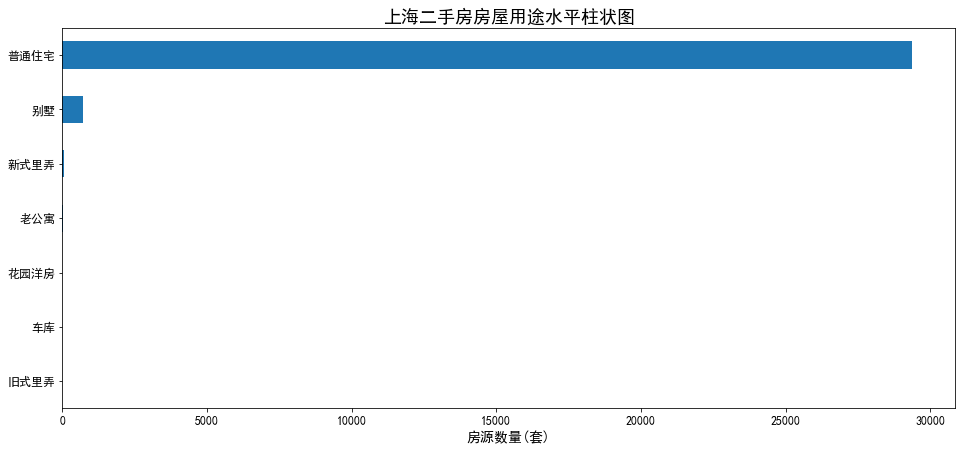

In [13]:
"""上海二手房房屋用途占水平柱状图"""
count_fwyt = df["fwyt"].value_counts(ascending=True)
count_fwyt.name = ""

fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot(111)
ax.set_xlabel("房源数量(套)",fontsize=14)
ax.set_title("上海二手房房屋用途水平柱状图",fontsize=18)
count_fwyt.plot(kind="barh",fontsize=12)

<AxesSubplot:title={'center':'上海二手房房屋户型占比情况'}>

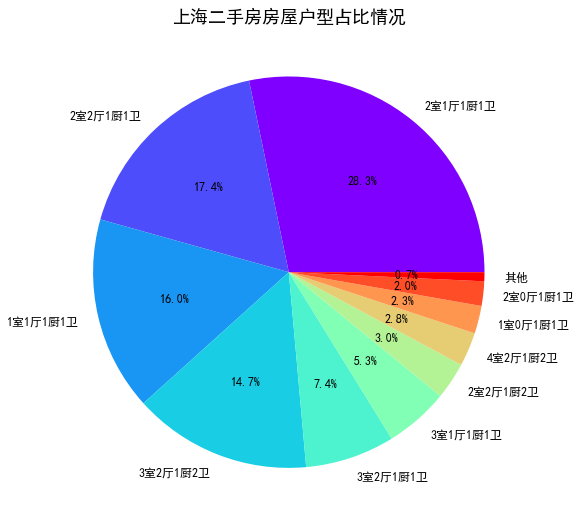

In [14]:

"""上海二手房房屋户型占比情况"""
count_fwhx = df['fwhx'].value_counts()[:10]
count_other_fwhx = pd.Series({"其他":df['fwhx'].value_counts()[10:].count()})
count_fwhx = count_fwhx.append(count_other_fwhx)
count_fwhx.index.name = ""
count_fwhx.name = ""

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.set_title("上海二手房房屋户型占比情况",fontsize=18)
count_fwhx.plot(kind="pie",cmap=plt.cm.rainbow,autopct="%3.1f%%",fontsize=12)


<AxesSubplot:title={'center':'上海二手房装修占比情况'}>

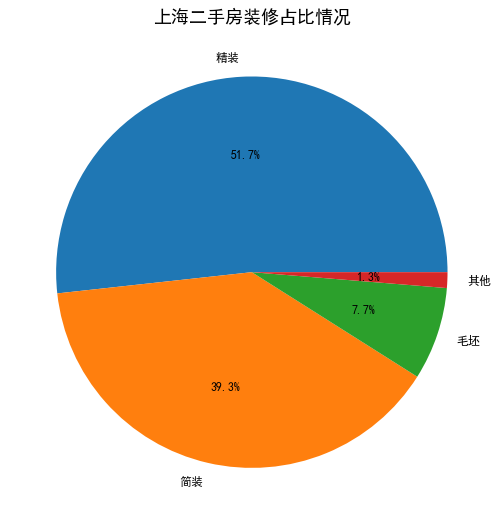

In [15]:
"""上海二手房房屋装修占比情况"""
count_zxqk = df["zxqk"].value_counts()
count_zxqk.name = ""

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.set_title("上海二手房装修占比情况",fontsize=18)
count_zxqk.plot(kind="pie",autopct="%3.1f%%",fontsize=12)

<AxesSubplot:title={'center':'上海二手房建筑类型占比情况'}>

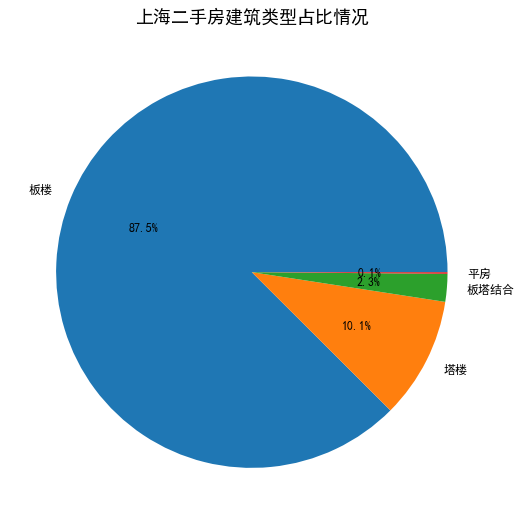

In [16]:
"""上海二手房建筑类型占比情况"""
count_jzlx = df["jzlx"].value_counts()
count_jzlx.name = ""

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.set_title("上海二手房建筑类型占比情况",fontsize=18)
count_jzlx.plot(kind="pie",autopct="%3.1f%%",fontsize=12)

<AxesSubplot:title={'center':'房源朝向分布情况'}>

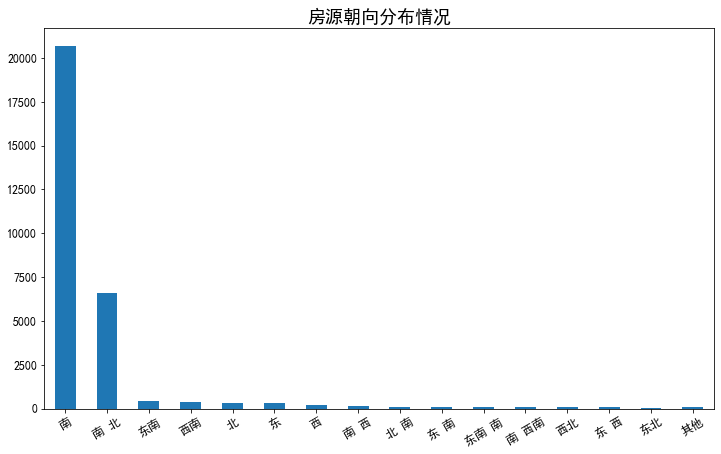

In [17]:
"""上海二手房房屋朝向分布情况"""
count_fwcx = df["fwcx"].value_counts()[:15]
count_other_fwcx = pd.Series({"其他":df['fwcx'].value_counts()[15:].count()})
count_fwcx = count_fwcx.append(count_other_fwcx)

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_title("房源朝向分布情况",fontsize=18)
count_fwcx.plot(kind="bar",fontsize=12,rot=30)

<AxesSubplot:title={'center':'上海二手房建筑面积分布区间'}, ylabel='建筑面积(㎡)'>

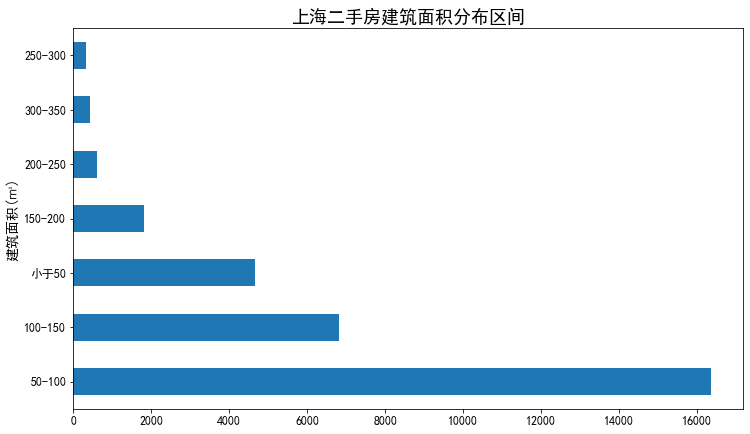

In [18]:
"""上海二手房建筑面积分布区间"""
area_level = [0, 50, 100, 150, 200, 250, 300, 500]    
label_level = ['小于50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350']    
jzmj_cut = pd.cut(df["jzmj"], area_level, labels=label_level)        
jzmj_result = jzmj_cut.value_counts()
#jzmj_result = jzmj_result.sort_values()

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_ylabel("建筑面积(㎡)",fontsize=14)
ax.set_title("上海二手房建筑面积分布区间",fontsize=18)
jzmj_result.plot(kind="barh",fontsize=12)

### 价格与平均面积相关数据

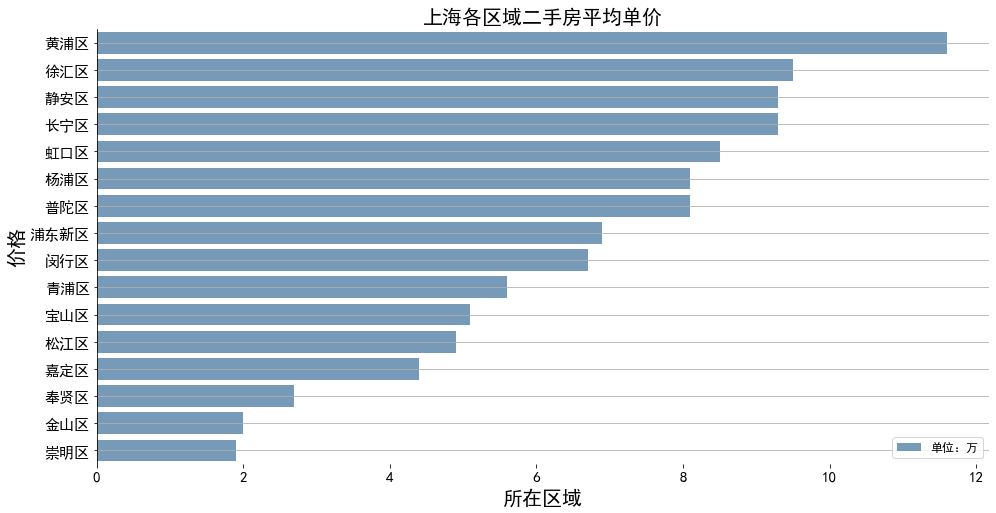

In [19]:
total = total.sort_values('平均单价', ascending=False)
plt.figure(figsize=(16, 8))
sns.barplot(y='所在区域', x='平均单价', data=total, label='单位：万',color='steelblue', alpha=0.8)

sns.despine(bottom=True)
plt.grid(axis='y')
plt.legend(fancybox=True, prop={'size': 12})
plt.xlabel('所在区域',fontsize=20)
plt.ylabel('价格',fontsize=20)
plt.title('上海各区域二手房平均单价',fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

In [20]:
map = Map()
map.add("平均单价", [list(z) for z in zip(total['所在区域'],total['平均单价'])],'上海')
map.set_global_opts(
    title_opts=opts.TitleOpts(title="上海各区域二手房平均单价（单位：万）"),
    visualmap_opts=opts.VisualMapOpts(max_=12),
)
map.render(path="上海各区域二手房平均单价地图.html")
map.render_notebook()  # 活动鼠标滚轮，可进行放大缩小

<AxesSubplot:title={'center':'上海各区域二手房单价箱线图（抽样数据）'}, ylabel='总价(万元)'>

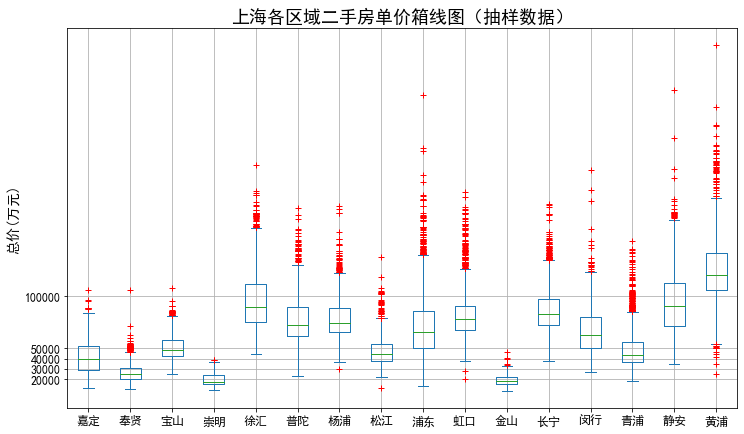

In [21]:
"""上海各区域二手房单价箱线图"""
#数据分组、数据运算和聚合
box_unitprice_area = df["unitPriceValue"].groupby(df["areaName"])
flag = True
box_data = pd.DataFrame(list(range(21000)),columns=["start"])
for name,group in box_unitprice_area:
    box_data[name] = group
del box_data["start"]
#mean_unitprice.index.name = ""

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_ylabel("总价(万元)",fontsize=14)
ax.set_title("上海各区域二手房单价箱线图（抽样数据）",fontsize=18)
box_data.plot(kind="box",fontsize=12,sym='r+',grid=True,ax=ax,yticks=[20000,30000,40000,50000,100000])

<AxesSubplot:title={'center':'上海二手房单价最高小区Top20'}>

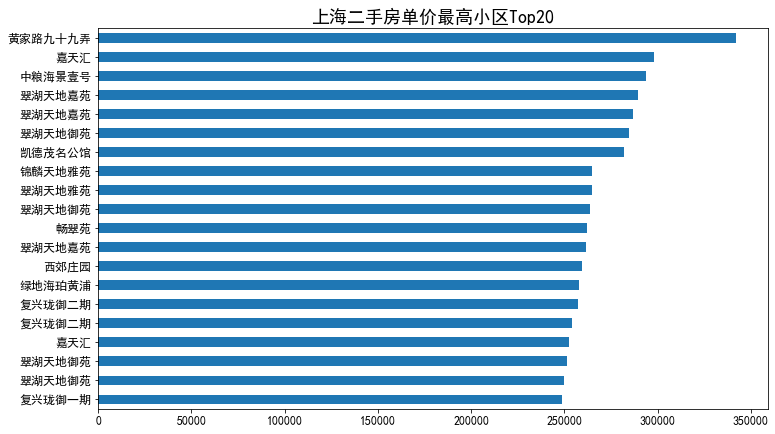

In [22]:
"""上海二手房单价最高小区Top20"""
unitprice_top = df.sort_values(by="unitPriceValue",ascending=False)[:20]
unitprice_top = unitprice_top.sort_values(by="unitPriceValue")
unitprice_top.set_index(unitprice_top["communityName"],inplace=True)
unitprice_top.index.name = ""

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_ylabel("单价(元/平米)",fontsize=14)
ax.set_title("上海二手房单价最高小区Top20",fontsize=18)
unitprice_top["unitPriceValue"].plot(kind="barh",fontsize=12)


<AxesSubplot:title={'center':'上海各区域二手房总价箱线图'}, ylabel='总价(万元)'>

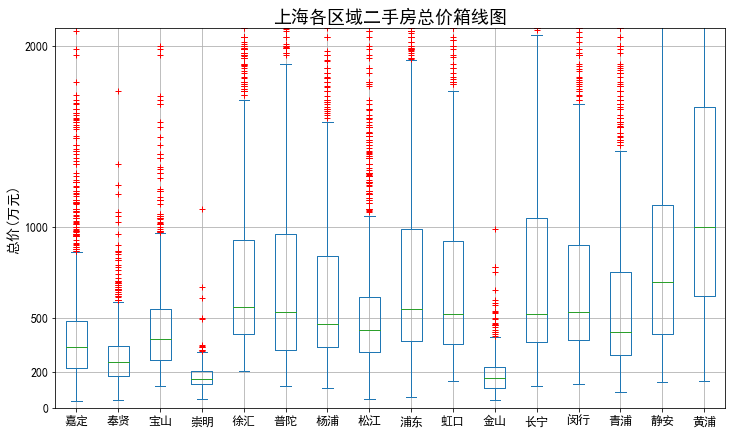

In [23]:
"""上海各区域二手房总价箱线图"""
#数据分组、数据运算和聚合
box_total_area = df["total"].groupby(df["areaName"])
flag = True
box_data = pd.DataFrame(list(range(21000)),columns=["start"])
for name,group in box_total_area:
    box_data[name] = group
del box_data["start"]
#mean_unitprice.index.name = ""

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_ylabel("总价(万元)",fontsize=14)
ax.set_title("上海各区域二手房总价箱线图",fontsize=18)
box_data.plot(kind="box",fontsize=12,sym='r+',grid=True,ax=ax,yticks=[0,200,500,1000,2000,3000],ylim=[0,2100])



<AxesSubplot:title={'center':'上海各区域二手房平均建筑面积'}, ylabel='建筑面积(㎡)'>

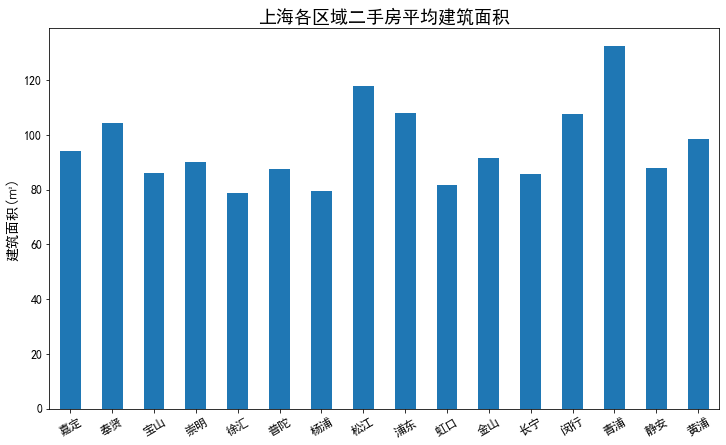

In [24]:
"""上海各区域二手房平均建筑面积"""
#数据运算
groups_area_jzmj = df["jzmj"].groupby(df["areaName"])
mean_jzmj = groups_area_jzmj.mean()
mean_jzmj.index.name = ""

#数据可视化
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_ylabel("建筑面积(㎡)",fontsize=14)
ax.set_title("上海各区域二手房平均建筑面积",fontsize=18)
mean_jzmj.plot(kind="bar",fontsize=12,rot=30)



Text(0, 0.5, '单价(元/平米)')

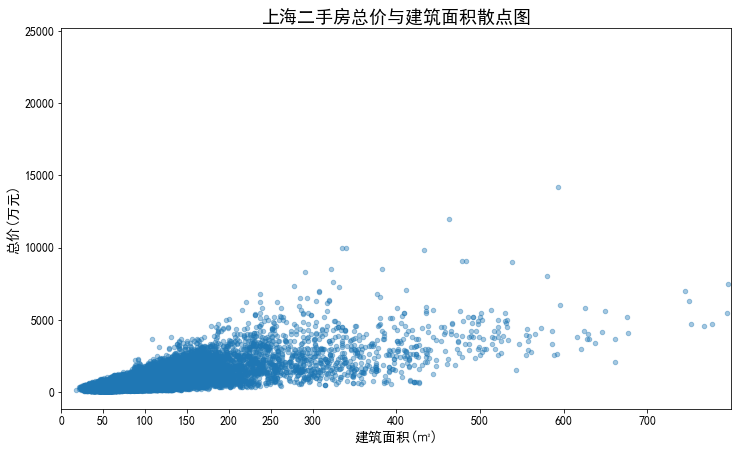

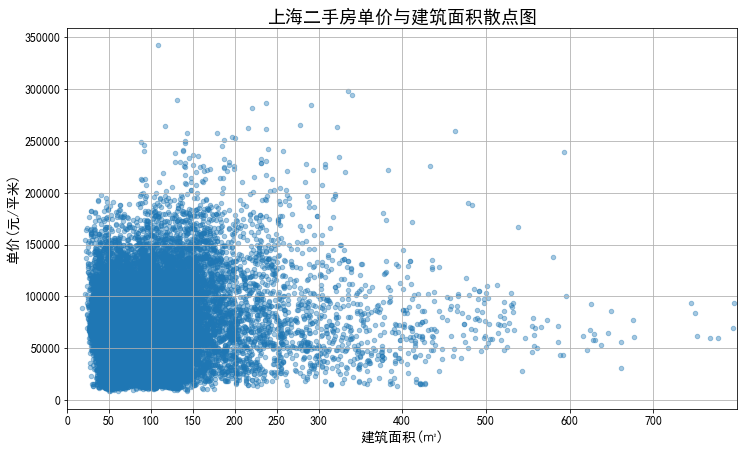

In [25]:
"""上海二手房总价与建筑面积散点图"""
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_title("上海二手房总价与建筑面积散点图",fontsize=18)
df.plot(x="jzmj", y="total", kind="scatter",fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,600,700],xlim=[0,800])
ax.set_xlabel("建筑面积(㎡)",fontsize=14)
ax.set_ylabel("总价(万元)",fontsize=14)

"""上海二手房单价与建筑面积散点图"""
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_title("上海二手房单价与建筑面积散点图",fontsize=18)
df.plot(x="jzmj",y="unitPriceValue",kind="scatter",grid=True,fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,600,700],xlim=[0,800])
ax.set_xlabel("建筑面积(㎡)",fontsize=14)
ax.set_ylabel("单价(元/平米)",fontsize=14)

### 上海二手房数据词云(见picture文件夹)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.556 seconds.
Prefix dict has been built successfully.


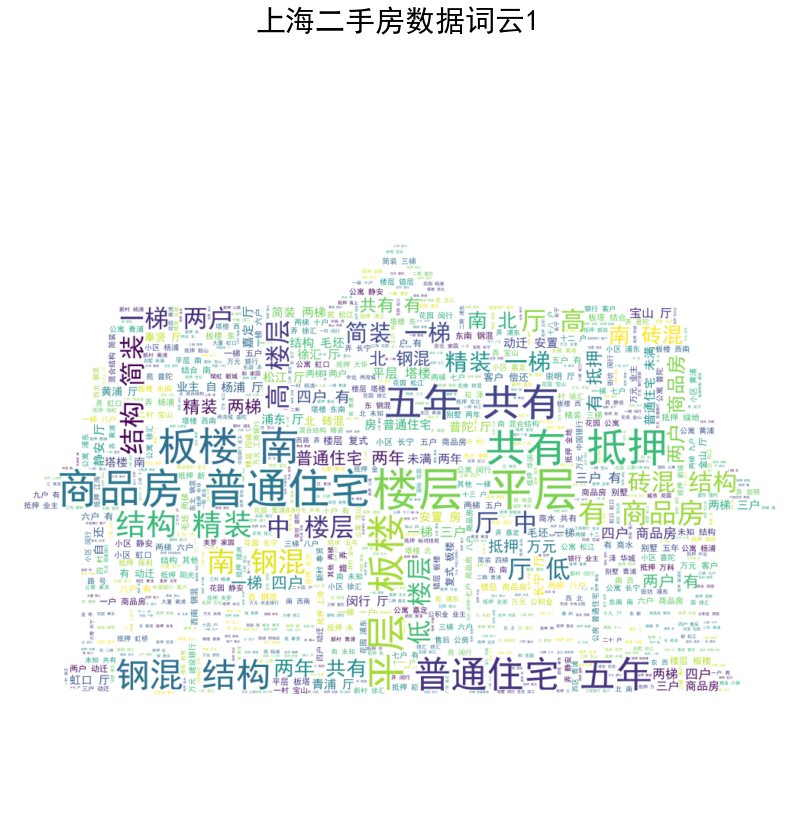

In [26]:
# -*- coding: utf-8 -*-


from wordcloud import WordCloud
import jieba

from imageio import imread


"""上海二手房数据词云"""
#基础配置数据
filename = "ershoufang.csv"
backpicture = "resources\\house2.jpg"
savepicture = "picture\\上海二手房数据词云.png"
fontpath = "resources\\simhei.ttf"
stopwords = ["null","暂无","数据","上传","照片","房本","室","层","厨","卫","无","非","已","满","共"]

#读入数据文件
comment_text = open(filename,encoding="utf-8").read()  
# 读取背景图片
color_mask = imread(backpicture) 
  
#结巴分词,同时剔除掉不需要的词汇    
ershoufang_words = jieba.cut(comment_text)
ershoufang_words = [word for word in ershoufang_words if word not in stopwords]
cut_text = " ".join(ershoufang_words) 

#设置词云格式
cloud = WordCloud(
    #设置字体，不指定就会出现乱码
    font_path=fontpath,
    #设置背景色
    background_color='white',
    #词云形状
    mask=color_mask,
    #允许最大词汇
    max_words=2000,
    #最大号字体
    max_font_size=60
   )
# 产生词云
word_cloud = cloud.generate(cut_text) 
#保存图片
word_cloud.to_file(savepicture) 

plt.figure(figsize=(14, 14))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title('上海二手房数据词云1', y=1.05,fontsize=30)
plt.axis("off")
plt.show()

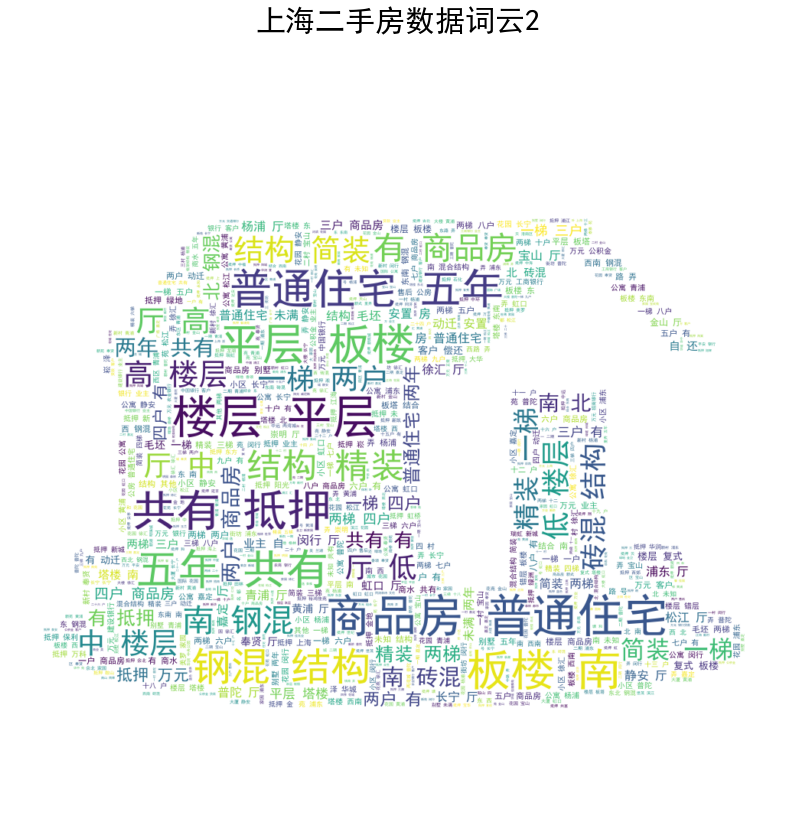

In [27]:
#基础配置数据
filename = "ershoufang.csv"
backpicture = "resources\\house1.jpg"
savepicture = "picture\\上海二手房数据词云.png"
fontpath = "resources\\simhei.ttf"
stopwords = ["null","暂无","数据","上传","照片","房本","室","层","厨","卫","无","非","已","满","共"]

#读入数据文件
comment_text = open(filename,encoding="utf-8").read()  
# 读取背景图片
color_mask = imread(backpicture) 
  
#结巴分词,同时剔除掉不需要的词汇    
ershoufang_words = jieba.cut(comment_text)
ershoufang_words = [word for word in ershoufang_words if word not in stopwords]
cut_text = " ".join(ershoufang_words) 

#设置词云格式
cloud = WordCloud(
    #设置字体，不指定就会出现乱码
    font_path=fontpath,
    #设置背景色
    background_color='white',
    #词云形状
    mask=color_mask,
    #允许最大词汇
    max_words=2000,
    #最大号字体
    max_font_size=60
   )
# 产生词云
word_cloud = cloud.generate(cut_text) 
#保存图片
word_cloud.to_file(savepicture) 

plt.figure(figsize=(14, 14))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title('上海二手房数据词云2', y=1.05,fontsize=30)
plt.axis("off")
plt.show()